#**Classification: K Nearest Neighbours (KNN)**
KNN is a very popular unsupervised machine learning algorithm. It is based on the idea that similar objects often belong to the same class. For example, patients having similar symptoms may suffer from the same disease. 

KNN is an instance based machine learning algorithm which means the learning does not happen coninuously and the bulk of computation happens just before data classification. 

One of the downsides of KNN is that it utilises considerable computational power which makes it difficult to use on very large datasets. 

Ideally, we want to classify all class objects correctly, as shown in the following figure. 

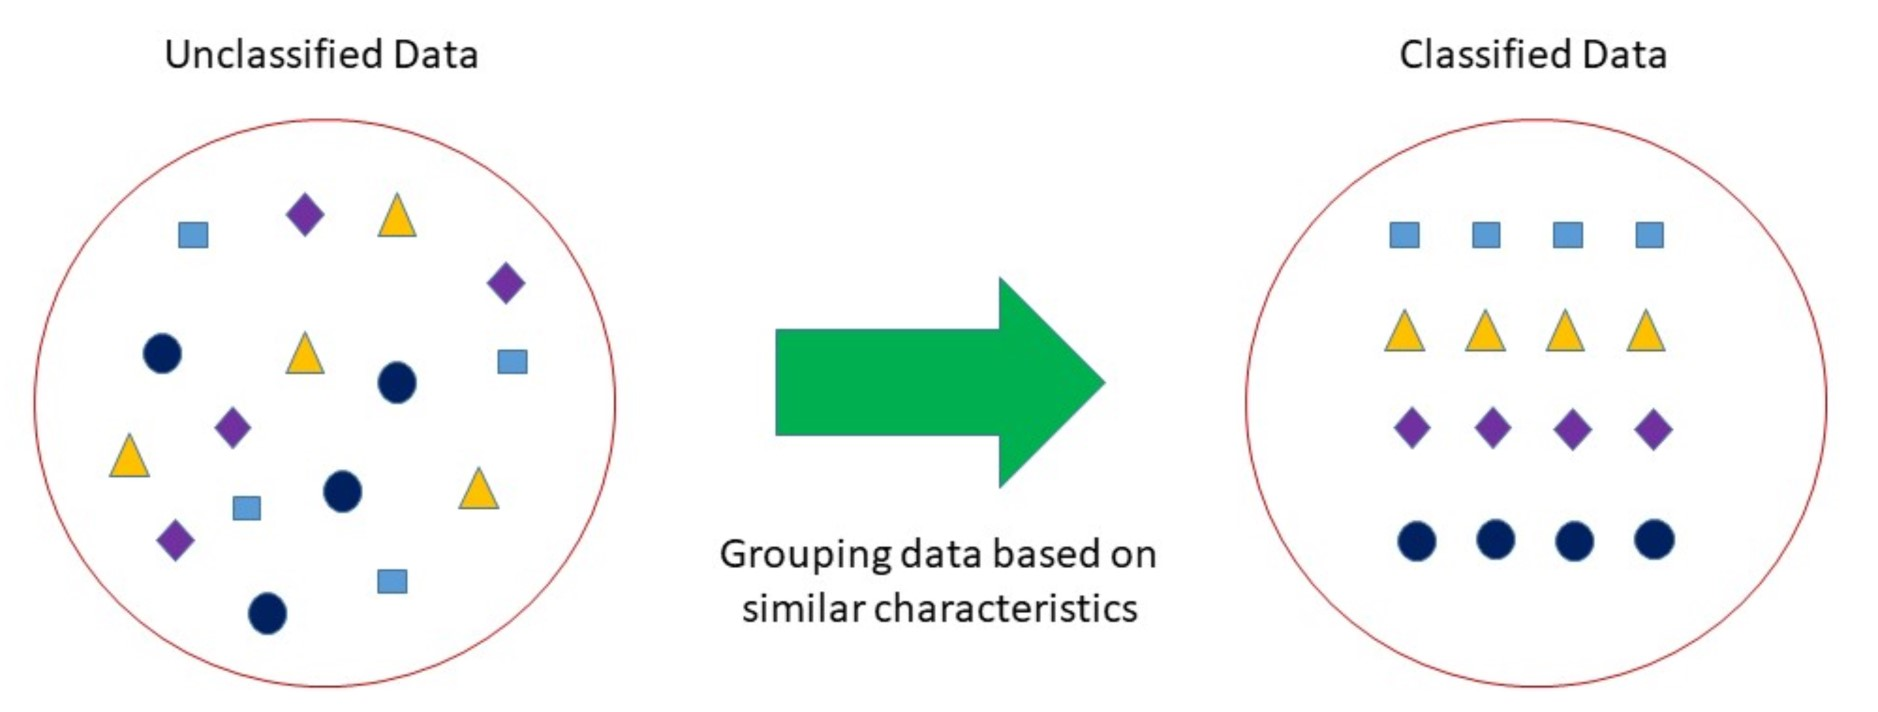

However, KNN works with distances between objects which means the closer the objects are together the more likely to be classified as belonging to the same class. 

##**Implementing KNN in Python**

In [1]:
import pandas as pd           #imports the Pandas library
import numpy as np            #imports the Numpy library

## Reading the dataset

In [3]:
data = pd.read_csv('HP.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

##Extracting the dependent and independent variables
The values of the independent variables are extracted and added into a matrix while the values of the dependent variable are extracted and added into a vector.

In [4]:
X = data.iloc[ : , [0,1]].values  #extracts all rows and selected columns
y = data.iloc[:, -1].values       #extracts all rows of the last column (dependent variable)

## Splitting data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
print(X_train)

[[26.7  36.2 ]
 [21.7  40.81]
 [27.   34.93]
 [22.9  37.87]
 [10.4  48.1 ]
 [21.9  48.1 ]
 [20.6  41.93]
 [26.4  36.09]
 [41.3  49.58]
 [17.2  48.1 ]
 [22.1  37.87]
 [20.4  40.01]
 [16.5  37.87]
 [24.4  40.59]
 [ 8.4  48.1 ]
 [23.   51.89]
 [ 9.7  48.1 ]
 [50.   31.21]
 [30.5  33.44]
 [12.3  48.1 ]
 [19.4  36.91]
 [21.2  39.69]
 [20.3  39.9 ]
 [18.8  55.65]
 [33.4  32.18]
 [18.5  35.86]
 [19.6  35.13]
 [33.2  36.41]
 [13.1  48.1 ]
 [ 7.5  48.1 ]
 [13.6  57.74]
 [17.4  49.58]
 [ 8.4  48.1 ]
 [35.4  31.22]
 [24.   36.2 ]
 [13.4  49.58]
 [26.2  35.86]
 [ 7.2  48.1 ]
 [13.1  48.1 ]
 [24.5  39.69]
 [37.2  32.46]
 [25.   35.64]
 [24.1  42.83]
 [16.6  38.14]
 [32.9  31.47]
 [36.2  32.18]
 [11.   48.1 ]
 [ 7.2  48.1 ]
 [22.8  39.9 ]
 [28.7  32.18]
 [14.4  51.89]
 [24.4  36.96]
 [18.1  51.89]
 [22.5  32.24]
 [20.5  55.65]
 [15.2  38.14]
 [17.4  36.07]
 [13.6  38.14]
 [ 8.2  48.1 ]
 [18.2  38.14]
 [35.4  33.33]
 [31.7  36.2 ]
 [33.   31.38]
 [22.2  37.38]
 [20.4  37.38]
 [23.9  34.86]
 [25.   48

In [7]:
print(y_train)

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0
 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


In [8]:
print(X_test)

[[22.6  33.24]
 [50.   48.1 ]
 [23.   43.89]
 [ 8.3  48.1 ]
 [21.2  42.83]
 [19.9  38.14]
 [20.6  48.1 ]
 [18.7  35.19]
 [16.1  39.9 ]
 [18.6  38.56]
 [ 8.8  48.1 ]
 [17.2  48.1 ]
 [14.9  48.1 ]
 [10.5  48.1 ]
 [50.   49.58]
 [29.   32.24]
 [23.   48.1 ]
 [33.3  31.52]
 [29.4  34.05]
 [21.   35.96]
 [23.8  37.38]
 [19.1  49.58]
 [20.4  38.56]
 [29.1  36.41]
 [19.3  36.91]
 [23.1  48.1 ]
 [19.6  38.14]
 [19.4  49.58]
 [38.7  32.89]
 [18.7  40.01]
 [14.6  48.1 ]
 [20.   48.1 ]
 [20.5  35.86]
 [20.1  34.93]
 [23.6  34.05]
 [16.8  48.1 ]
 [ 5.6  48.1 ]
 [50.   48.1 ]
 [14.5  48.1 ]
 [13.3  48.1 ]
 [23.9  43.92]
 [20.   36.91]
 [19.8  33.24]
 [13.8  48.1 ]
 [16.5  31.89]
 [21.6  37.07]
 [20.3  43.92]
 [17.   49.58]
 [11.8  49.58]
 [27.5  38.56]
 [15.6  49.58]
 [23.1  39.69]
 [24.3  36.2 ]
 [42.8  35.86]
 [15.6  51.89]
 [21.7  37.87]
 [17.1  36.06]
 [17.2  34.39]
 [15.   48.1 ]
 [21.7  40.59]
 [18.6  31.69]
 [21.   39.9 ]
 [33.1  36.09]
 [31.5  36.2 ]
 [20.1  48.1 ]
 [29.8  33.44]
 [15.2  48

In [9]:
print(y_test)

[1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0]


## Features Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
print(X_train)

[[ 4.45723525e-01 -7.04924553e-01]
 [-9.64343124e-02 -4.48775539e-02]
 [ 4.78252996e-01 -8.86759626e-01]
 [ 3.36835686e-02 -4.65818590e-01]
 [-1.32171103e+00  9.98884403e-01]
 [-7.47479989e-02  9.98884403e-01]
 [-2.15709037e-01  1.15480936e-01]
 [ 4.13194055e-01 -7.20674047e-01]
 [ 2.02882441e+00  1.21078669e+00]
 [-5.84376366e-01  9.98884403e-01]
 [-5.30616854e-02 -4.65818590e-01]
 [-2.37395350e-01 -1.59419332e-01]
 [-6.60278464e-01 -4.65818590e-01]
 [ 1.96330920e-01 -7.63765430e-02]
 [-1.53857416e+00  9.98884403e-01]
 [ 4.45267254e-02  1.54152608e+00]
 [-1.39761312e+00  9.98884403e-01]
 [ 2.97217905e+00 -1.41937890e+00]
 [ 8.57763482e-01 -1.10009369e+00]
 [-1.11569105e+00  9.98884403e-01]
 [-3.45826918e-01 -6.03268724e-01]
 [-1.50650096e-01 -2.05236044e-01]
 [-2.48238507e-01 -1.75168827e-01]
 [-4.10885858e-01  2.07987244e+00]
 [ 1.17221503e+00 -1.28049699e+00]
 [-4.43415329e-01 -7.53604808e-01]
 [-3.24140604e-01 -8.58124181e-01]
 [ 1.15052871e+00 -6.74857336e-01]
 [-1.02894579e+00  9

In [12]:
print(X_test)

[[ 1.15409837e-03 -1.12872913e+00]
 [ 2.97217905e+00  9.98884403e-01]
 [ 4.45267254e-02  3.96108293e-01]
 [-1.54941732e+00  9.98884403e-01]
 [-1.50650096e-01  2.44340437e-01]
 [-2.91611134e-01 -4.27160740e-01]
 [-2.15709037e-01  9.98884403e-01]
 [-4.21729015e-01 -8.49533548e-01]
 [-7.03651091e-01 -1.75168827e-01]
 [-4.32572172e-01 -3.67026306e-01]
 [-1.49520153e+00  9.98884403e-01]
 [-5.84376366e-01  9.98884403e-01]
 [-8.33768972e-01  9.98884403e-01]
 [-1.31086787e+00  9.98884403e-01]
 [ 2.97217905e+00  1.21078669e+00]
 [ 6.95116131e-01 -1.27190636e+00]
 [ 4.45267254e-02  9.98884403e-01]
 [ 1.16137187e+00 -1.37499396e+00]
 [ 7.38488758e-01 -1.01275558e+00]
 [-1.72336410e-01 -7.39287086e-01]
 [ 1.31271979e-01 -5.35975429e-01]
 [-3.78356388e-01  1.21078669e+00]
 [-2.37395350e-01 -3.67026306e-01]
 [ 7.05959288e-01 -6.74857336e-01]
 [-3.56670075e-01 -6.03268724e-01]
 [ 5.53698822e-02  9.98884403e-01]
 [-3.24140604e-01 -4.27160740e-01]
 [-3.45826918e-01  1.21078669e+00]
 [ 1.74690234e+00 -1

## Training the K-NN model on the Training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [14]:
print(model.predict(ss.transform([[16.5,37.87]])))

[1]


## Predicting the Test set results

In [15]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)



array([[38, 20],
       [18, 26]], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.6274509803921569